# Logistic Regression

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [11]:
dataset = pd.read_csv('Dataset.csv')
#dataset = dataset.drop("studentid",axis = 1)

In [12]:
dataset.head()

,sex,age,Pstatus,guardian,higher,romantic,activities,Walc,failures,G1,G2,G3,Pass/Fail
0,1,15.0,2,2,2,1,2,1,1,7.0,10.0,10.0,1
1,1,15.0,2,2,2,2,1,4,2,8.0,6.0,5.0,1
2,1,15.0,2,2,2,1,2,1,0,14.0,13.0,13.0,2
3,1,15.0,2,2,2,1,2,1,0,10.0,9.0,8.0,1
4,1,15.0,2,3,2,2,2,3,2,10.0,10.0,10.0,2


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    int64  
 1   age         395 non-null    float64
 2   Pstatus     395 non-null    int64  
 3   guardian    395 non-null    int64  
 4   higher      395 non-null    int64  
 5   romantic    395 non-null    int64  
 6   activities  395 non-null    int64  
 7   Walc        395 non-null    int64  
 8   failures    395 non-null    int64  
 9   G1          395 non-null    float64
 10  G2          395 non-null    float64
 11  G3          395 non-null    float64
 12  Pass/Fail   395 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 40.2 KB


In [14]:
dataset.describe()

,sex,age,Pstatus,guardian,higher,romantic,activities,Walc,failures,G1,G2,G3,Pass/Fail
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000
mean,1.473418,16.696203,1.896203,1.853165,1.949367,1.334177,1.508861,2.291139,0.334177,10.908861,10.713924,10.415190,1.58481
std,0.499926,1.276043,0.305384,0.536684,0.219525,0.472300,0.500555,1.287897,0.743651,3.319195,3.761505,4.581443,0.49338
min,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.00000
25%,1.000000,16.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,8.000000,9.000000,8.000000,1.00000
50%,1.000000,17.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,11.000000,11.000000,11.000000,2.00000
75%,2.000000,18.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,13.000000,13.000000,14.000000,2.00000
max,2.000000,22.000000,2.000000,3.000000,2.000000,2.000000,2.000000,5.000000,3.000000,19.000000,19.000000,20.000000,2.00000


In [15]:
dataset.corr()

,sex,age,Pstatus,guardian,higher,romantic,activities,Walc,failures,G1,G2,G3,Pass/Fail
sex,1.000000,-0.028606,0.023443,-0.071343,-0.151056,-0.102023,0.099833,0.274194,0.044436,0.091839,0.091099,0.103456,0.119781
age,-0.028606,1.000000,0.029598,0.290485,-0.209081,0.164669,-0.103063,0.117276,0.243665,-0.064081,-0.143474,-0.161579,-0.120228
Pstatus,0.023443,0.029598,1.000000,-0.108715,-0.040735,-0.040451,0.097352,0.006045,-0.003339,-0.016868,-0.041382,-0.058009,-0.034074
guardian,-0.071343,0.290485,-0.108715,1.000000,-0.020179,0.093945,-0.023488,-0.040810,0.180494,-0.041727,-0.087495,-0.070109,-0.077459
higher,-0.151056,-0.209081,-0.040735,-0.020179,1.000000,-0.105664,0.096484,-0.100340,-0.300316,0.178264,0.179129,0.182465,0.133482
romantic,-0.102023,0.164669,-0.040451,0.093945,-0.105664,1.000000,0.019651,-0.010141,0.093137,-0.037188,-0.111774,-0.129970,-0.045691
activities,0.099833,-0.103063,0.097352,-0.023488,0.096484,0.019651,1.000000,-0.037477,-0.069341,0.057010,0.050552,0.016100,-0.005620
Walc,0.274194,0.117276,0.006045,-0.040810,-0.100340,-0.010141,-0.037477,1.000000,0.141962,-0.126179,-0.084927,-0.051939,-0.088886
failures,0.044436,0.243665,-0.003339,0.180494,-0.300316,0.093137,-0.069341,0.141962,1.000000,-0.354718,-0.355896,-0.360415,-0.347227
G1,0.091839,-0.064081,-0.016868,-0.041727,0.178264,-0.037188,0.057010,-0.126179,-0.354718,1.000000,0.852118,0.801468,0.778107


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Pstatus'}>,
        <AxesSubplot:title={'center':'guardian'}>],
       [<AxesSubplot:title={'center':'higher'}>,
        <AxesSubplot:title={'center':'romantic'}>,
        <AxesSubplot:title={'center':'activities'}>,
        <AxesSubplot:title={'center':'Walc'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>],
       [<AxesSubplot:title={'center':'Pass/Fail'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

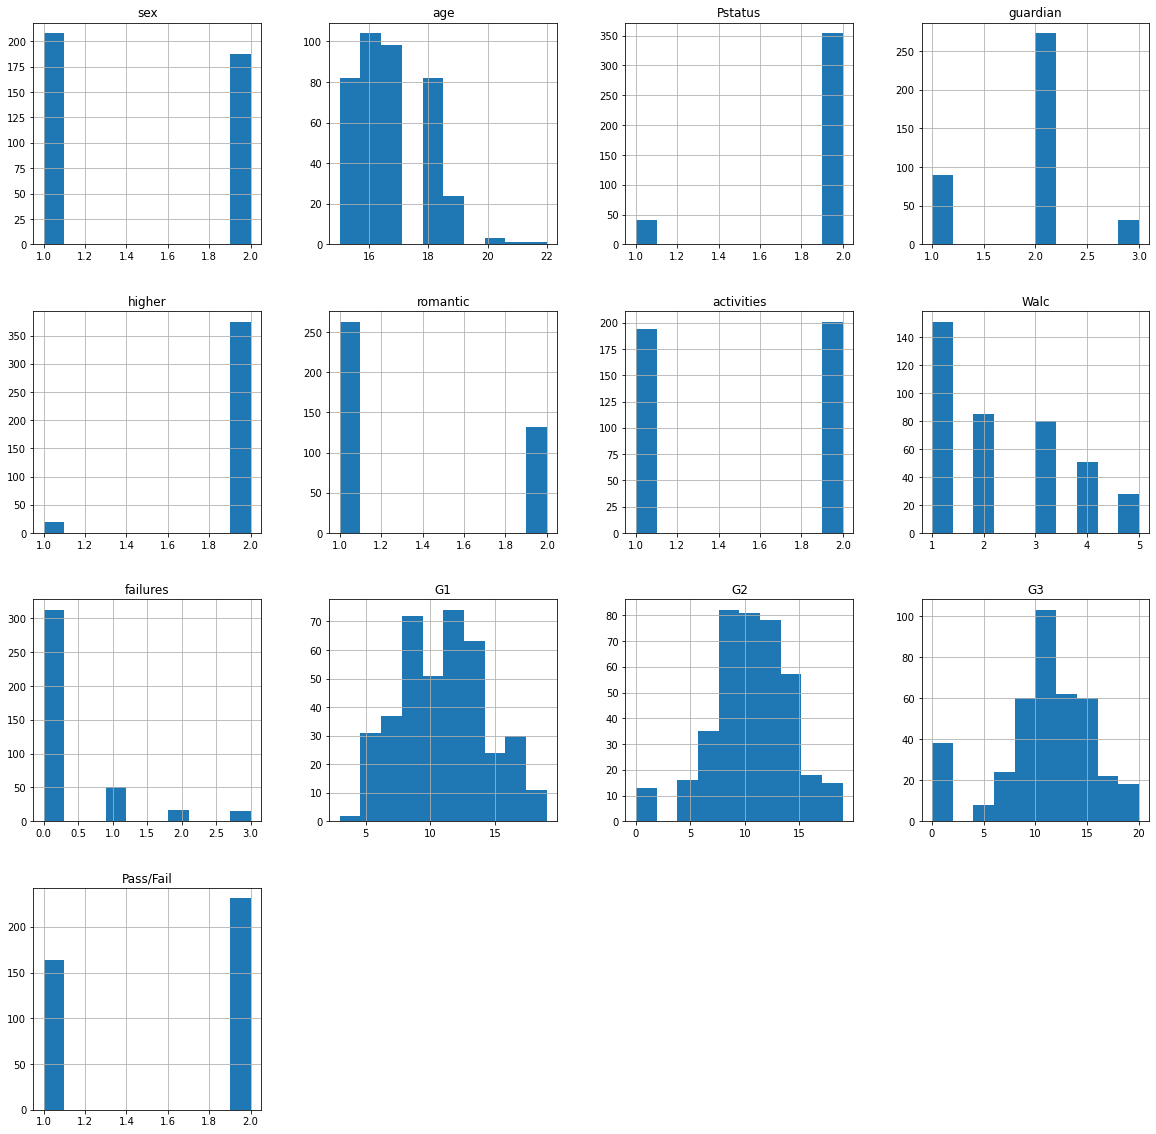

In [16]:
dataset.hist(figsize = (20,20))

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [19]:
print(X_train)

[[ 1. 20.  2. ... 15. 14. 15.]
 [ 1. 15.  2. ...  7.  8. 10.]
 [ 2. 18.  2. ...  6.  9.  8.]
 ...
 [ 1. 17.  2. ... 16. 17. 17.]
 [ 1. 16.  2. ... 10.  8. 11.]
 [ 1. 19.  2. ... 13. 11. 11.]]


In [20]:
print(y_train)

[2 1 1 2 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 1
 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 2 1 2 1 2 1
 2 2 1 1 1 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 2 2
 2 2 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 2 2 2 1 1 2 1 1 2 1 2 1 1 1 2
 2 2 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 2 2 1 1 1 2 1 1 2 2 1 2 2 1 2 1 2 1 2 1
 2 1 1 1 1 2 2 2 1 2 1 1 2 1 2 1 2 1 2 2 1 2 2 1 1 1 2 1 2 1 1 2 1 1 1 2 2
 2 1 1 2 2 2 2 2 2 2 1 2 2 1 2]


In [21]:
print(X_test)

[[ 2. 18.  2. ... 10. 10.  9.]
 [ 2. 18.  2. ...  3.  5.  5.]
 [ 2. 18.  2. ... 14. 13. 14.]
 ...
 [ 2. 18.  2. ... 11. 12. 10.]
 [ 1. 17.  2. ... 16. 15. 15.]
 [ 1. 15.  1. ...  8.  8.  6.]]


In [22]:
print(y_test)

[1 1 2 2 2 1 2 1 1 1 2 2 2 1 1 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 1 2 1 2 1
 1 2 1 2 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1 1
 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2 2 1 2 1
 1 2 1 2 2 1 1 2 2 1]


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
print(X_train)

[[-0.96271972  2.56792186  0.33567254 ...  1.38816793  0.99527812
   1.09456981]
 [-0.96271972 -1.28884291  0.33567254 ... -1.14256899 -0.68758215
  -0.04721296]
 [ 1.03872391  1.02521595  0.33567254 ... -1.45891111 -0.40710544
  -0.50392606]
 ...
 [-0.96271972  0.253863    0.33567254 ...  1.70451005  1.83670826
   1.55128291]
 [-0.96271972 -0.51748996  0.33567254 ... -0.19354264 -0.68758215
   0.18114359]
 [-0.96271972  1.79656891  0.33567254 ...  0.7554837   0.15384799
   0.18114359]]


In [25]:
print(X_test)

[[ 1.03872391  1.02521595  0.33567254 ... -0.19354264 -0.12662873
  -0.27556951]
 [ 1.03872391  1.02521595  0.33567254 ... -2.40793745 -1.52901228
  -1.18899572]
 [ 1.03872391  1.02521595  0.33567254 ...  1.07182582  0.71480141
   0.86621325]
 ...
 [ 1.03872391  1.02521595  0.33567254 ...  0.12279947  0.4343247
  -0.04721296]
 [-0.96271972  0.253863    0.33567254 ...  1.70451005  1.27575483
   1.09456981]
 [-0.96271972 -1.28884291 -2.97909382 ... -0.82622688 -0.68758215
  -0.96063917]]


## Training the Logistic Regression model on the Training set

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [27]:
#print(classifier.predict(sc.transform([[0,0,0,0,0,1,1,1,0,2,0,1,0,1,2,3,2,0,2,4,3,1,1,0,0,3,4,2,1,1,7,7,2,3,1,2,2]])))

## Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]

## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred),2)*100

[[60  3]
 [ 1 94]]


97.0

### Pickling

In [30]:
import pickle
filename = "classification.sav"

In [31]:
pickle.dump(classifier, open(filename, "wb"))

In [32]:
with open("classification.sav", "rb") as f:
    load_model = pickle.load(f)

In [33]:
#test = [[0,0,0,0,0,1,1,1,0,2,0,1,0,1,2,3,2,0,2,4,3,1,1,0,0,3,4,2,1,1,7,7,2,3,1,2,2]]
#pred = load_model.predict(test)
#print(pred)